# <img src="https://img.icons8.com/bubbles/100/000000/3d-glasses.png" style="height:50px;display:inline"> EE 046746 - Technion - Computer Vision


## Homework 2 - Deep Neural Networks, Classifiers & Features
---

### <a style='color:red'> Due Date: 11.5.2020 </a>

## Part 1 - Design and Build a CNN Classifier

1. Load the SVHN dataset with PyTorch using torchvision.datasets.SVHN(root, split='train', transform=None,
target_transform=None, download=True) , you can read more here: https://pytorch.org/docs/stable/torchvision/datasets.html#svhn
(https://pytorch.org/docs/stable/torchvision/datasets.html#svhn). Display 5 images from the train set.




In [0]:
#import from tutorial
import numpy as np
import matplotlib.pyplot as plt
import time
import os


import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

# import datasets in torchvision
import torchvision.datasets as datasets

# import model zoo in torchvision
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision import utils


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


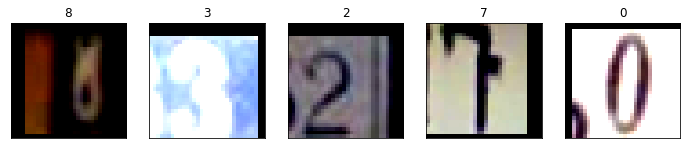

In [0]:

transform_train = transforms.Compose([
  transforms.RandomCrop(32, padding=4),
  transforms.RandomHorizontalFlip(),
  transforms.ToTensor(),
  transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
  ])

# Normalize the test set same as training set without augmentation
transform_test = transforms.Compose([
  transforms.ToTensor(),
  transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
  ])

trainset = datasets.SVHN(root='./datasets', split='train', transform=transform_train, target_transform=None, download=True)
testset = datasets.SVHN(root='./datasets', split='test', transform=transform_test, target_transform=None, download=True)


# let's see some of the images
def convert_to_imshow_format(image):
 # first convert back to [0,1] range from [-1,1] range - approximately...
  image = image / 2 + 0.5
  image = image.numpy()
  # convert from CHW to HWC
  # from 3x32x32 to 32x32x3
  return image.transpose(1,2,0)

Classes = ('0', '1', '2', '3', '4','5', '6', '7', '8', '9')
trainloader = torch.utils.data.DataLoader(trainset,
batch_size=5,
shuffle=True)
dataiter = iter(trainloader)
images, labels = dataiter.next()
fig, axes = plt.subplots(1, len(images), figsize=(12,2.5))
for idx, image in enumerate(images):
 axes[idx].imshow(convert_to_imshow_format(image))
 axes[idx].set_title(Classes[labels[idx]])
 axes[idx].set_xticks([])
 axes[idx].set_yticks([])



2. Design a Convolutional Neural Network (CNN) to classify digits from the images.
Describe the chosen architecture, how many layers? What activations did you choose? What are the filter sizes? Did you use fullyconnected
layers (if you did, explain their sizes)?
What is the input dimension? What is the output dimension?
Calculate the number of parameters (weights) in the network.

In [0]:
class SVHN_CNN(nn.Module):
  """CNN for the SVHN Datset"""
  def __init__(self):
    """CNN Builder."""
    super(SVHN_CNN, self).__init__()
    self.conv_layer = nn.Sequential(
      # Conv Layer block 1
      nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
      nn.BatchNorm2d(32),
      nn.ReLU(inplace=True),
      nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
      nn.ReLU(inplace=True),
      nn.MaxPool2d(kernel_size=2, stride=2),
      # Conv Layer block 2
      nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
      nn.BatchNorm2d(128),
      nn.ReLU(inplace=True),
      nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
      nn.ReLU(inplace=True),
      nn.MaxPool2d(kernel_size=2, stride=2),
      nn.Dropout2d(p=0.05),
      # Conv Layer block 3
      nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
      nn.BatchNorm2d(256),
      nn.ReLU(inplace=True),
      nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
      nn.ReLU(inplace=True),
      nn.MaxPool2d(kernel_size=2, stride=2),
      )
    self.fc_layer = nn.Sequential(
      nn.Dropout(p=0.1),
      nn.Linear(4096, 1024),
      nn.ReLU(inplace=True),
      nn.Linear(1024, 512),
      nn.ReLU(inplace=True),
      nn.Dropout(p=0.1),
      nn.Linear(512, 10)
      )
    
  def forward(self, x):
      """Perform forward."""
      # conv layers
      x = self.conv_layer(x)

      # flatten
      x = x.view(x.size(0), -1)

      # fc layer
      x = self.fc_layer(x)
      return x


3. Train the classifier (preferably on a GPU - use Colab for this part if you don't have a GPU).
Describe the the hyper-parameters of the model (batch size, epochs, learning rate....). How did you tune your model? Did you use a
validation set to tune the model?
What is the final accuracy on the test set?

In [0]:
# hyper-parameters
batch_size = 64 #tutorial 128
learning_rate =  1e-4
epochs = 20 #tutorial 20

# dataloaders - creating batches and shuffling the data
trainloader = torch.utils.data.DataLoader(
trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(
testset, batch_size=batch_size, shuffle=False, num_workers=2)


# device - cpu or gpu?
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# loss criterion
criterion = nn.CrossEntropyLoss()
# build our model and send it to the device
model = SVHN_CNN().to(device) # no need for parameters as we alredy defined them in the class
# optimizer - SGD, Adam, RMSProp...
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# function to calcualte accuracy of the model
def calculate_accuracy(model, dataloader, device):
  model.eval() # put in evaluation mode = train
  total_correct = 0
  total_images = 0
  confusion_matrix = np.zeros([10,10], int)
  with torch.no_grad():
    for data in dataloader:
      images, labels = data
      images = images.to(device)
      labels = labels.to(device)
      outputs = model(images)
      _, predicted = torch.max(outputs.data, 1)
      total_images += labels.size(0)
      total_correct += (predicted == labels).sum().item()
      for i, l in enumerate(labels):
        confusion_matrix[l.item(), predicted[i].item()] += 1
    model_accuracy = total_correct / total_images * 100
    return model_accuracy, confusion_matrix


In [0]:
# training loop
for epoch in range(1, epochs + 1):
  model.train() # put in training mode
  running_loss = 0.0
  epoch_time = time.time()
  for i, data in enumerate(trainloader, 0):
    # get the inputs
    inputs, labels = data
    # send them to device
    inputs = inputs.to(device)
    labels = labels.to(device)
    # forward + backward + optimize
    outputs = model(inputs) # forward pass
    loss = criterion(outputs, labels) # calculate the loss
    # always the same 3 steps
    optimizer.zero_grad() # zero the parameter gradients
    loss.backward() # backpropagation
    optimizer.step() # update parameters
    # print statistics
    running_loss += loss.data.item()

    # Normalizing the loss by the total number of train batches
  running_loss /= len(trainloader)
  # Calculate training/test set accuracy of the existing model
  train_accuracy, _ = calculate_accuracy(model, trainloader, device)
  test_accuracy, _ = calculate_accuracy(model, testloader, device)
  log = "Epoch: {} | Loss: {:.4f} | Training accuracy: {:.3f}% | Test accuracy: {:.3f}% | ".format(epoch
  , running_loss, train_accuracy, test_accuracy)
  epoch_time = time.time() - epoch_time
  log += "Epoch Time: {:.2f} secs".format(epoch_time)
  print(log)


  # i dont know if the OS instructions are relevant for us 
  
print('==> Finished Training ...')

Epoch: 1 | Loss: 1.1131 | Training accuracy: 83.264% | Test accuracy: 82.764% | Epoch Time: 84.74 secs
Epoch: 2 | Loss: 0.4573 | Training accuracy: 88.607% | Test accuracy: 88.683% | Epoch Time: 84.77 secs
Epoch: 3 | Loss: 0.3645 | Training accuracy: 90.468% | Test accuracy: 90.884% | Epoch Time: 84.71 secs
Epoch: 4 | Loss: 0.3209 | Training accuracy: 91.730% | Test accuracy: 92.263% | Epoch Time: 84.69 secs
Epoch: 5 | Loss: 0.2908 | Training accuracy: 92.167% | Test accuracy: 92.425% | Epoch Time: 84.75 secs
Epoch: 6 | Loss: 0.2710 | Training accuracy: 93.064% | Test accuracy: 93.370% | Epoch Time: 84.97 secs
Epoch: 7 | Loss: 0.2559 | Training accuracy: 93.150% | Test accuracy: 93.285% | Epoch Time: 84.89 secs
Epoch: 8 | Loss: 0.2420 | Training accuracy: 93.665% | Test accuracy: 93.520% | Epoch Time: 85.01 secs
Epoch: 9 | Loss: 0.2281 | Training accuracy: 94.078% | Test accuracy: 94.234% | Epoch Time: 84.70 secs
Epoch: 10 | Loss: 0.2187 | Training accuracy: 94.676% | Test accuracy: 94

## Part 2 - Analyzing a Pre-trained CNN

1. Load a pre-trained VGG16 with PyTorch using torchvision.models.vgg16(pretrained=True, progress=True, **kwargs) , you can
read more here: https://pytorch.org/docs/stable/torchvision/models.html#classification
(https://pytorch.org/docs/stable/torchvision/models.html#classification). Don't forget to use the model in evaluation mode ( model.eval() ).

In [31]:
import cv2

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = models.vgg16(pretrained=True, progress=True)
model.to(device)
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

2. Load the images in the ./birds folder and display them.

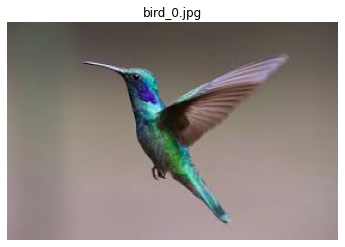

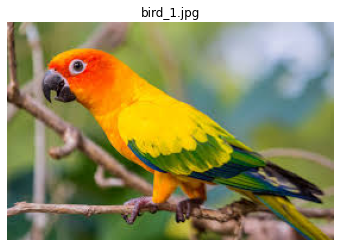

In [32]:
items = os.listdir('./birds')

for each_image in items:
  if each_image.endswith(".jpg"):
    full_path = "./birds/" + each_image
    im = cv2.imread(full_path)
    image = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)  
    plt.figure()
    plt.imshow(image)
    plt.title(each_image)
    plt.axis(False)
    plt.grid(False)


3. Pre-process the images to fit VGG16's architecture. What steps did you take?

In [0]:
import json
from urllib.request import urlopen
from PIL import Image
target_url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"

def preprocess(image,device=torch.device("cpu")):
  transfom_normalize = transforms.Compose([
      transforms.Resize((224,224)),
      transforms.CenterCrop(224),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
  ])
  input_tensor = transfom_normalize(image)
  input_batch = input_tensor.unsqueeze(0).to(device) # create a mini-batch as expected by the model
    # move the input and model to GPU for speed if available
  if torch.cuda.is_available():
      input_batch = input_batch.to('cuda')
      model.to('cuda')
  return input_batch


def forward_pass(input_batch):
  #loading the targets of the image - models
  
  json_data = urlopen(target_url) 
  class_idx = json.load(json_data)

  with torch.no_grad():
    # tensor of shape 1000
    output = model(input_batch)

    # we using softmax to normalize the output
    softmax = torch.nn.functional.softmax(output[0], dim=0)
    softmax_val = max(softmax)
    prob = softmax_val*100
    calssifiact_ind =(((softmax_val == softmax).nonzero())[0][0]).item()
    calssifiact = (class_idx.get(str(calssifiact_ind)))[1]
    print("calssification : {}, with probability {:.2f}%".format(calssifiact,prob))
    



4. Feed the images (forward pass) to the model. What are the outputs?

In [34]:
items = os.listdir('./birds')   
for each_image in items:
  if each_image.endswith(".jpg"):
    full_path = "./birds/" + each_image
    input_image = Image.open(full_path)
    print(each_image)
    in_batch = preprocess(input_image,device)
    forward_pass(in_batch)


bird_0.jpg
calssification : hummingbird, with probability 70.39%
bird_1.jpg
calssification : lorikeet, with probability 64.63%


5. Find an image of a bird/cat/dog on the internet, display it and feed it to network. What are the outputs?

calssification : English_foxhound, with probability 46.12%


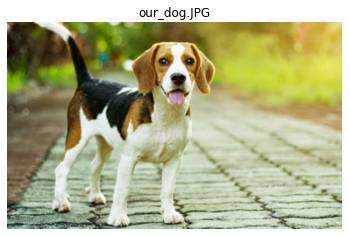

In [37]:
items = os.listdir('./my_data')  

for each_image in items:
  if each_image.endswith(".JPG"):
    full_path = "./my_data/" + each_image
    im = cv2.imread(full_path)
    image = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)  
    plt.figure()
    plt.title(each_image)
    plt.imshow(image)
    plt.axis(False)
    input_image = Image.open(full_path)
    in_batch = preprocess(input_image,device)
    forward_pass(in_batch)

6. Apply the following 3 transformations to create 3 new images from the image from step 5, and display them ( opencv has functions for all):
One geometric transformation (rotation, scaling, translation, warping...).
One color transformation (thresholding, different color space, hue, saturation, brightness, contrast...).
One filter (any filter you want).

(-0.5, 565.5, 348.5, -0.5)

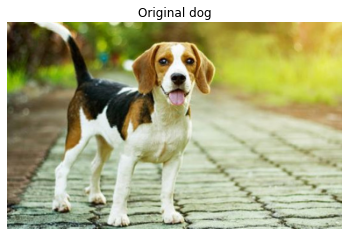

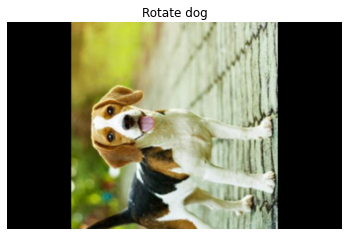

In [38]:
import tensorflow as tf

#rotation
full_path = "./my_data/our_dog.JPG"
im = cv2.imread(full_path)
our_dog_img = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(our_dog_img)
plt.axis(False)
plt.title("Original dog")
image = cv2.imread( "./my_data/our_dog.JPG",0)
rows,cols = image.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv2.warpAffine(im,M,(cols,rows))
rotated = cv2.cvtColor(dst,cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(rotated)
plt.title("Rotate dog")
plt.axis(False)




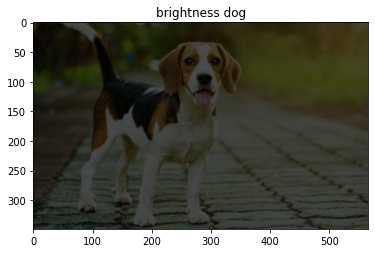

In [40]:
# brighting image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

img = load_img(full_path)
# convert to numpy array
data = img_to_array(img)
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(brightness_range=[0.2,1.0])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
batch = it.next()
image_b = batch[0].astype('uint8')
pyplot.imshow(image_b)
# show the figure
plt.title("brightness dog")
pyplot.show()


7. Feed the transformed images to network, what is the output? is different than section 5?

(-0.5, 565.5, 348.5, -0.5)

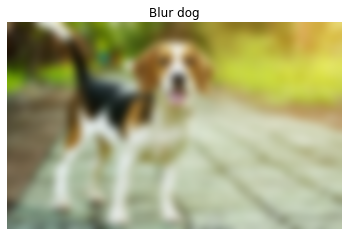

In [41]:
from PIL import Image
from PIL import ImageFilter
# Filter - Gaussian blur
our_dog_image = Image.open(full_path)
GaussianBlur_dog = our_dog_image.filter(ImageFilter.GaussianBlur(radius=7))
plt.figure()
plt.imshow(GaussianBlur_dog)
plt.title("Blur dog")
plt.axis(False)

In [42]:
rot = transforms.ToPILImage(mode='RGB')(rotated)
print("rotated")
norm_rot = preprocess(rot,device)
forward_pass(norm_rot)

bright = transforms.ToPILImage(mode='RGB')(image_b)
print("brightness")
norm_bright = preprocess(bright,device)
forward_pass(norm_bright)

print("GaussianBlur")
GaussianBlur_dog_norm = preprocess(GaussianBlur_dog,device)
forward_pass(GaussianBlur_dog_norm)


rotated
calssification : Chihuahua, with probability 18.76%
brightness
calssification : Walker_hound, with probability 53.30%
GaussianBlur
calssification : rock_beauty, with probability 9.17%



8. For the first 3 filters in the first layer of VGG16, plot the filters, and then plot their response (their output) for the image from section 5 and the 3
images from section 6 (total of 4 input images). Consult ee046746_appndx_visualizing_cnn_filters.ipynb to refresh your memory.
Explain what do you see.

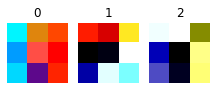

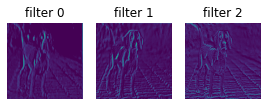

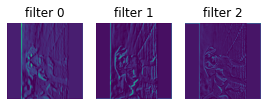

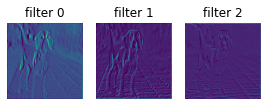

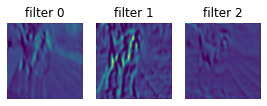

In [43]:
def plot_filters_multi_channel(t,num):
  # get the number of kernals
  num_kernels = t.shape[0]

  # define number of columns for subplots
  num_cols = 12
  # rows = num of kernels
  num_rows = num_kernels

  # set the figure size
  fig = plt.figure(figsize=(num_cols,num_rows))

  # looping through all the kernels
  for i in range(num):
    ax1 = fig.add_subplot(num_rows,num_cols,i+1)

    # for each kernel, we convert the tensor to numpy
    npimg = np.array(t[i].cpu().numpy(), np.float32)
    # standardize the numpy image
    npimg = (npimg - np.mean(npimg)) / np.std(npimg)
    npimg = np.minimum(1, np.maximum(0, (npimg + 0.5)))
    npimg = npimg.transpose((1, 2, 0))
    ax1.imshow(npimg)
    ax1.axis('off')
    ax1.set_title(str(i))
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])

  # plt.savefig('myimage.png', dpi=100)
  plt.tight_layout()

def plot_weights(model, layer_num, single_channel=True, collated=False):
  # extracting the model features at the particular layer number
  layer = model.features[layer_num]
  # checking whether the layer is convolution layer or not
  if isinstance(layer, nn.Conv2d):
    # getting the weight tensor data
    weight_tensor = model.features[layer_num].weight.data
    if single_channel:
      if collated:
        plot_filters_single_channel_big(weight_tensor)
      else:
        plot_filters_single_channel(weight_tensor)
    else:
      if weight_tensor.shape[1] == 3:
        plot_filters_multi_channel(weight_tensor,3)
      else:
        print("Can only plot weights with three channels with single channel = False")
  else:
      print("Can only visualize layers which are convolutional")


# Gives the filter
def filter_outputs(image, model, layer_to_visualize,num):
  modulelist = list(model.features.modules())
  if layer_to_visualize < 0:
    layer_to_visualize += 31
  output = None
  name = None
  for count, layer in enumerate(modulelist[1:]):
    image = layer(image)
    if count == layer_to_visualize:
      output = image
      name = str(layer)

  filters = []
  output = output.data.squeeze().cpu().numpy()
  for i in range(output.shape[0]):
    filters.append(output[i,:,:])

  fig = plt.figure(figsize=(10, 10))

  for i in range(num):
    ax = fig.add_subplot(np.sqrt(len(filters)), np.sqrt(len(filters)), i+1)
    plt.title('filter %i'  %i)
    imgplot = ax.imshow(filters[i])
    ax.set_axis_off()
    plt.tight_layout()

plot_weights(model, 0, single_channel=False)
orginal_dog = transforms.ToPILImage(mode='RGB')(im)
our_dog = preprocess(orginal_dog,device)
filter_outputs(our_dog, model, 0,3)

filter_outputs(norm_rot, model, 0,3)
filter_outputs(norm_bright, model, 0,3)
filter_outputs(GaussianBlur_dog_norm, model, 0,3)
 

9. For each image in the ./dogs and ./cats folders, extract and save their feature vectors (create a numpy array or a torch tensor that
contains the features for all samples) from a fully-connected layer (such as FC7 ) of the VGG16 model (you need to write a function that does
the feed forward manually until the desired layer, there is an example in ee046746_appndx_visualizing_cnn_filters.ipynb ). Which layer
did you pick? What is the size of the feature space?

In [0]:
def layer_outputs(image, model):
  modulelist = list(model.features.modules())
  for layer in modulelist[1:]:
    image = layer(image)
  avg_pool=model.avgpool
  image=avg_pool(image)
  image=image.view(image.size(0),-1)
  modulelist = list(model.classifier.modules())
  for layer in modulelist[1:7]:
    image = layer(image)
  return image[0].data.cpu().numpy()


# dogs 
feature_vectors = []
items = os.listdir('./dogs')  
for each_image in items:
  if each_image.endswith(".jpg"):
    full_path = "./dogs/" + each_image
    input_image = Image.open(full_path)
    prep_img = preprocess(input_image, device)
    feature_vectors.append(layer_outputs(prep_img,model)) 

# cats 
items = os.listdir('./cats')  
for each_image in items:
  if each_image.endswith(".jpg"):
    full_path = "./cats/" + each_image
    input_image = Image.open(full_path)
    prep_img = preprocess(input_image, device)
    feature_vectors.append(layer_outputs(prep_img,model))

10. Build a Support Vector Machine (SVM) classifier ( sklearn.svm.LinearSVC ) to classify cats and dogs based on the features you extracted.
Use the 20 images as train set, and choose 4 images (2 dogs, 2 cats) from the internet as test sets. You can choose a different classifer than
SVM from the scikit-learn library, no need to explain how it works (but report the name of the algorithm you used). What are the results?



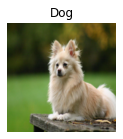

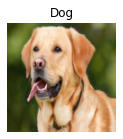

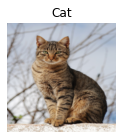

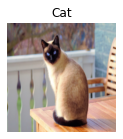

In [45]:
# SVM
from sklearn.svm import SVC



def plot_im(image, device=torch.device("cpu")):
    #Convert the image to image plotable
   image = image[0].cpu().numpy() * np.array([[[0.229, 0.224, 0.225]]]).T + np.array([[[0.485, 0.456, 0.406]]]).T
   return np.minimum(1,np.maximum(0,image.transpose(1, 2, 0)))

# Train images 
#list of 20 items (4096,)
X = feature_vectors 
X = np.array(X)

#lables, targets 1 is for dog, 0 is for cat 
targets = np.array([1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0])
clf = SVC(gamma='auto')
clf.fit(X, targets)


#normalize the test set
cat_norm_1 = preprocess(Image.open('./my_data/our_cat_1.jpg'),device)
cat_norm_2 = preprocess(Image.open('./my_data/our_cat_2.jpg'),device)
dog_norm_1 = preprocess(Image.open('./my_data/our_dog_1.jpg'),device)
dog_norm_2 = preprocess(Image.open('./my_data/our_dog_2.jpg'),device)


cat_features_1 = layer_outputs(cat_norm_1, model).reshape(1, -1)
cat_features_2 = layer_outputs(cat_norm_2, model).reshape(1, -1)
dog_features_1 = layer_outputs(dog_norm_1, model).reshape(1, -1)
dog_features_2 = layer_outputs(dog_norm_2, model).reshape(1, -1)

#making 2D array
tests = [[dog_norm_1,dog_features_1], 
         [dog_norm_2,dog_features_2], 
         [cat_norm_1,cat_features_1],
         [cat_norm_2,cat_features_2]
]

classes = ['Cat','Dog']

for i,(im, features) in enumerate(tests):
  pred = classes[int(clf.predict(features))] 
  plt.figure(figsize=(6,2))
  plt.title(pred)
  im = plot_im(im)
  plt.imshow(im)
  plt.axis(False)